<a href="https://colab.research.google.com/github/ag20327/CE888/blob/main/Assignment_2/SpecificModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Specific Model**

To test with rotation or non rotation, rerun this cells and training while changing the data agumentation accordingly

*Change model save path for each model correspondingly

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32
directory = r"/content/drive/MyDrive/DataScience/Data/Train_Revised" #Location of folder

In [ ]:
#Load the data into Python and divide into training and validation
#The data is loaded shuffled to reduce bias
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    color_mode="rgb",#3 Channels
    batch_size=batch_size,
    image_size=image_size, #Image resizing
    shuffle=True,
    seed=9999,
    validation_split=0.15,
    subset="training",
)


Found 36593 files belonging to 2 classes.
Using 31105 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(

    directory,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=9999,
    validation_split=0.15,
    subset="validation",
)

Found 36593 files belonging to 2 classes.
Using 5488 files for validation.


In [ ]:
#Data augmentation with experimental layers
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        #layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
    ]
)

#Augmentate the complete dataset for trainning and validation
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

augmented_val_ds = val_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

#buffered prefetching for performance
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
augmented_val_ds = augmented_val_ds.prefetch(buffer_size=32)

**Model Preparation**

In [ ]:
## Xception
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten,SeparableConv2D,BatchNormalization,Activation,GlobalAveragePooling2D 
from tensorflow.keras import Model

img_input = Input(shape=(299, 299, 3))

In [ ]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


model.summary()


91889664/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [ ]:
num_classes = 1
last_layer = model.get_layer('block14_sepconv1_act').output

x= SeparableConv2D(2048, (3, 3) ,name='block14_sepconv2',padding="same",use_bias=False)(last_layer) #listo
x= BatchNormalization(name='block14_sepconv2_bn')(x)#listo
x = Activation (activation='relu', name='block14_sepconv2_act')(x)#listo
x = GlobalAveragePooling2D (name='avg_pool')(x)#listo


out = Dense(num_classes, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-5]:
	layer.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(augmented_train_ds,
                               epochs=10, 
                               validation_data=augmented_val_ds,
                               callbacks=my_callbacks
                    )

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save(r"/content/drive/MyDrive/DataScience/Saved_Model_Specific_No_Rot")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DataScience/Saved_Model_Specific_No_Rot/assets


**Specific Rotation applied**

In [ ]:
#Load the data into Python and divide into training and validation
#The data is loaded shuffled to reduce bias
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    color_mode="rgb",#3 Channels
    batch_size=batch_size,
    image_size=image_size, #Image resizing
    shuffle=True,
    seed=9999,
    validation_split=0.15,
    subset="training",
)


Found 36593 files belonging to 2 classes.
Using 31105 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(

    directory,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=9999,
    validation_split=0.15,
    subset="validation",
)

Found 36593 files belonging to 2 classes.
Using 5488 files for validation.


In [ ]:
#Data augmentation with experimental layers
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
    ]
)

#Augmentate the complete dataset for trainning and validation
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

augmented_val_ds = val_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

#buffered prefetching for performance
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=32)
augmented_val_ds = augmented_val_ds.prefetch(buffer_size=32)

**Model Preparation**

In [ ]:
## Xception
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten,SeparableConv2D,BatchNormalization,Activation,GlobalAveragePooling2D 
from tensorflow.keras import Model

img_input = Input(shape=(299, 299, 3))

In [ ]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")


model.summary()


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
num_classes = 1
last_layer = model.get_layer('block14_sepconv1_act').output

x= SeparableConv2D(2048, (3, 3) ,name='block14_sepconv2',padding="same",use_bias=False)(last_layer) #listo
x= BatchNormalization(name='block14_sepconv2_bn')(x)#listo
x = Activation (activation='relu', name='block14_sepconv2_act')(x)#listo
x = GlobalAveragePooling2D (name='avg_pool')(x)#listo


out = Dense(num_classes, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-5]:
	layer.trainable = False

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(augmented_train_ds,
                               epochs=10, 
                               validation_data=augmented_val_ds,
                               callbacks=my_callbacks
                    )

Epoch 1/10
973/973 [==============================] - 13141s 13s/step - loss: 0.0480 - acc: 0.9817 - val_loss: 0.0060 - val_acc: 0.9984
Epoch 2/10
973/973 [==============================] - 218s 224ms/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.0032 - val_acc: 0.9989
Epoch 3/10
973/973 [==============================] - 219s 224ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.0064 - val_acc: 0.9980
Epoch 4/10
973/973 [==============================] - 219s 224ms/step - loss: 0.0118 - acc: 0.9969 - val_loss: 0.0032 - val_acc: 0.9995
Epoch 5/10
973/973 [==============================] - 219s 224ms/step - loss: 0.0138 - acc: 0.9962 - val_loss: 9.0999e-04 - val_acc: 0.9996
Epoch 6/10
973/973 [==============================] - 218s 224ms/step - loss: 0.0036 - acc: 0.9987 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 7/10
973/973 [==============================] - 219s 225ms/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0021 - val_acc: 0.9993
Epoch 8/10
973/973 [========================

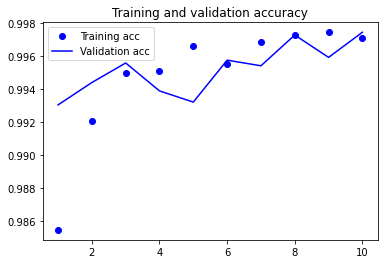

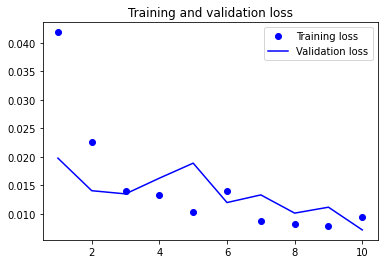

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save(r"/content/drive/MyDrive/DataScience/Saved_Model_Specific_Rot")

# **Testing**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32

In [2]:
image_size = (299, 299) #Expected input of Xception with 3 channels
batch_size = 32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/drive/MyDrive/DataScience/Data/Test _Revised",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
)


Found 7924 files belonging to 2 classes.


In [3]:
from tensorflow.keras import layers
#Data augmentation with experimental layers
data_augmentation = keras.Sequential(
    [
        #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        #layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1./255),
    ]
)

#Augmentate the complete dataset for trainning and validation
augmented_test_ds = test_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))



#buffered prefetching for performance
augmented_test_ds = augmented_test_ds.prefetch(buffer_size=32)

Specific Rotation applied

In [4]:
model = keras.models.load_model(r"/content/drive/MyDrive/DataScience/Saved_Model_Specific_Rot")

In [ ]:
print("Evaluate on test data")
results = model.evaluate(augmented_test_ds)
print("test loss, test acc:", results)

Evaluate on test data
248/248 [==============================] - 2891s 11s/step - loss: 1.3464 - acc: 0.8423
test loss, test acc: [1.3463549613952637, 0.8422513604164124]


Specific **No** Rotation applied

In [ ]:
model = keras.models.load_model(r"/content/drive/MyDrive/DataScience/Saved_Model_Specific_No_Rot")

In [ ]:
print("Evaluate on test data")
results = model.evaluate(augmented_test_ds)
print("test loss, test acc:", results)

Evaluate on test data
248/248 [==============================] - 39s 151ms/step - loss: 1.1219 - acc: 0.7867
test loss, test acc: [1.1218881607055664, 0.7867238521575928]
